# **Exercises about entropy**

## Exercise 1)

The table below present the values of $Cº_{p,m} (J mol^{-1} K^{-1})$ of $O_2(g)$ in he range of 298 K to 1500 K. a) Fit a third degree polynomial to the heat capacity data in function of temperature and plot  $Cº_{p,m}$ versus temperature. b) A second alternative is to fit the equation $Cº_{p,m} = A + BT + CT^2 + D/T^2 $ to the given data. Perform the fit of this function to the given data and plot $Cº_{p,m}$ versus temperature. c) Compare the previous results.

|   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|T (K)|298.15|400.|500.|600.|700.|800.|900.|1000.|1100.|1200.|1300.|1400.|1500.
|Cp (J/K mol)|29.376| 30.106| 31.091| 32.090| 32.981| 33.733| 34.355| 34.870| 35.300| 35.667| 35.988| 36.277| 36.544


In [1]:
# Loading of the necessary packages to solve the exercises
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import quad


# a)

In [2]:
# Arrays that will be plotted

T = np.array([298.15,400.,500.,600.,700.,800.,900.,1000.,1100.,1200.,1300.,1400.,1500.])
Cp = np.array([29.376, 30.106, 31.091, 32.090, 32.981, 33.733, 34.355, 34.870, 35.300, 35.667,35.988, 36.277, 36.544])

# Polynomial fit
deg = 3
z = np.polyfit(T, Cp, deg)
y = np.poly1d(z)

#printing the formated results

print('Cºp,m = ' + format(z[3] , ' 6.5f') + ' +' + format(z[2] , ' 6.5f') + 'T' + format(z[1] , ' 6.5e') + 'T²' + format(z[0] , ' 6.5e') + 'T³')   




Cºp,m =  25.66508 + 0.01304T-3.81147e-06T²-5.57560e-11T³


<function matplotlib.pyplot.show>

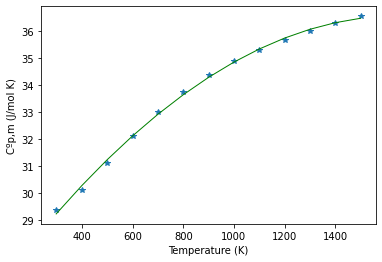

In [3]:
#plot of Cp versus T

plt.plot(T,Cp,'*')
plt.plot(T,y(T), color='green', linewidth=1)
plt.xlabel('Temperature (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

# b)

In [4]:
# defining the funcion that will be used 

def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# the fit will be performed using least-squares
# popt are the optimized parametes obtaines after the fit
# pcov is the covariance matrix of popt. The standard deviation of the fit can be evaluate using this matrix
popt, pcov = curve_fit(func, T, Cp)

#printing the formated results
print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   



Cºp,m =  2.483e+01 + 1.456e-02T -4.560e-06T²  + 4.90797e+04/T²


<function matplotlib.pyplot.show>

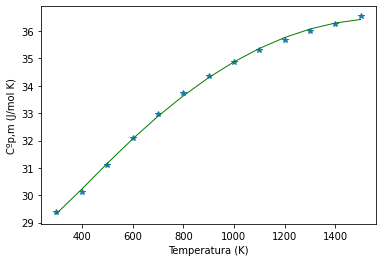

In [5]:
#plot of Cp versus T

plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

## Exercise 2)

 Cp/T versus T graphs can be used to estimate the entropy of material since the entropy is the area below the curve. The following table presents the Cp changes of $Na_2SO_4$ in function of the temperature. a) Conduct a polynomial fit that passes through the origin of the given data and calculate the $Na_2SO_4$ entropy at 90 K. b) At low temperatures, the Cp/T values may behave as an aT³ function (where “a” is a constant). Check the temperature range that this approach is valid. c) Fit the $ Cº_{p,m} = A + BT + CT^2 + \frac{D}{T^2} $ function to the given data and calcule the entropy at 90 K. d) Perform the same fit of the last item, but consider a function of type $ Cº_{p,m} = A + BT + CT^2 + DT^3 $ and calculate the entropy at 90 K. Compare both fits performed.

|   |   |   |   |   |   |   |   |   |  
|---|---|---|---|---|---|---|---|---|
|Cp($cal K^{-1}$ )|0.171|0.286|0.626|1.615|4.346|7.032|10.48|13.28|15.33
|T(K)|13.74|16.25|20.43|27.73|41.11|52.72|68.15|82.96|95.71


# a)

In [6]:
# Variables used in this exercise

T = np.array([13.74,16.25,20.43,27.73,41.11,52.72,68.15,82.96,95.71])
Cp = np.array([0.171,0.286,0.626,1.615,4.346,7.032,10.48,13.28,15.33])

# Definition of the function that will be used
def func(T, b, c, d):

    return b*T + c*T**2 + d*T**3

# the fit will be performed using least-squares
# popt are the optimized parametes obtaines after the fit
# pcov is the covariance matrix of popt. The standard deviation of the fit can be evaluate using this matrix
popt, pcov = curve_fit(func, T, Cp)

#printing the formated results
print('Cºp,m = ' + format(popt[0] , ' 6.3e') + 'T  +' + format(popt[1] , ' 6.3e') + 'T² ' + format(popt[2] , ' 6.5e') + 'T³')   



Cºp,m = -5.746e-02T  + 5.167e-03T² -3.03363e-05T³


<function matplotlib.pyplot.show>

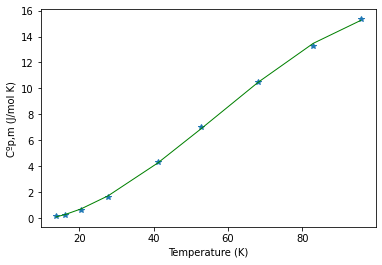

In [7]:
#plot of Cp versus T

plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='green', linewidth=1)
plt.xlabel('Temperature (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

In [8]:
# performing the integration in the interval informed
# the function that will be integrated is divided by T.
def func(T):

    return popt[0] + popt[1]*T + popt[2]*T**2

ans, err = quad(func, 0, 90) #Perform the integral calculation and estimate the integral error
print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('numerical error of integration = ' + format(err, '6.3e'))

Delta S (J/K mol)=  8.382
numerical error of integration = 1.006e-13


# b)
The temperature range that the Debye's Law fit is valid should be analyzed first.

a= 6.383e-05
standard deviation = 1.919e-06


<function matplotlib.pyplot.show>

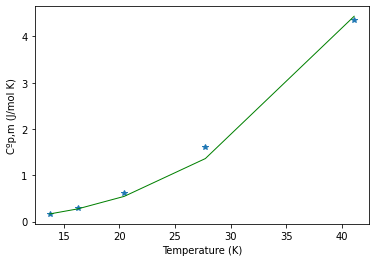

In [9]:
#The student may change T and Cp range of values to analyze the quality of the fit using Debye's Law.

Ti = T[:5]  # pick only the first five temperature values
Cpi = Cp[:5] # pick only the first five heat capacity values

# Difining the Debye's Law function
def func(Ti, a):

    return a*Ti**3

a, pcov = curve_fit(func, Ti, Cpi) # conduct the model fitting

perr = np.sqrt(np.diag(pcov)) # standard deviation calculus

#imprimir só os coeficientes na forma de vetor
print('a= ' + format(a[0] , '6.3e'))
print('standard deviation = ' + format(perr[0], '6.3e'))

#plot of Cp versus T
plt.plot(Ti,Cpi,'*')
plt.plot(Ti,func(Ti, *a), color='green', linewidth=1)
plt.xlabel('Temperature (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

# Solution of (c) and (d) itens.

In [10]:
# Considering the first function


# Defining the function used in the fit
def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# the fit will be performed using least-squares
# popt are the optimized parametes obtaines after the fit
# pcov is the covariance matrix of popt. The standard deviation of the fit can be evaluate using this matrix
popt, pcov = curve_fit(func, T, Cp)

# printing the fitted model
print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   


# Entropy calculation by integration of the equation obtained after the fit
def func(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

ans, err = quad(func, 0, 90) # performing the integration of the third law entropy

print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('error in the integration = ' + format(err, '6.3e'))

Cºp,m = -6.436e+00 + 2.829e-01T -5.728e-04T²  + 5.61810e+02/T²
Delta S (J/K mol)= -36.947
error in the integration = 2.677e+01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.


In [11]:
# Considering the third degree polynomial


deg = 3
z = np.polyfit(T, Cp, deg)
y = np.poly1d(z)


print('Cºp,m = ' + format(z[3] , ' 6.5f') + format(z[2] , ' 6.5f') + 'T + ' + format(z[1] , ' 6.5e') + 'T² ' + format(z[0] , ' 6.5e') + 'T³')   



# Entropy calculation by integration of the equation obtained after the fit
def func(T):

    return z[3]/T + z[2] + z[1]*T + z[0]*T**2

ans, err = quad(func, 0, 90) # performing the integration of the third law entropy


print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('error in the integration = ' + format(err, '6.3e'))

Cºp,m = -0.20558-0.04189T +  4.85438e-03T² -2.85176e-05T³
Delta S (J/K mol)=  0.393
error in the integration = 1.922e+00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


The entropy values calculated in items (a), (c), and (d) differ in value and signal. There is no agreement between the employed methods. A small difference due to numerical errors, and the integration of different functions was expected, not the high difference observed in the results. Since the Cp/T functions considered in the items (c) and (d) have an indetermination in the origin, an error occurs during the numerical integration. In these cases, the integral should be divided into two intervals:

$$ \Delta Sº = \int_{0}^{90} \frac{C_p}{T} dT = \int_{0}^{T_{low}} \frac{C_p}{T} dT + \int_{T_{low}}^{90} \frac{C_p}{T} dT $$

As discussed in item (b), Cp can obey a function of type $ aT^3$, in this case, the integration becomes:  

$$ \Delta Sº = \int_{0}^{T_{low}} \frac{aT^3}{T} dT + \int_{T_{low}}^{90} \frac{C_p}{T} dT $$ 

ou 

$$ \Delta Sº = \frac{aT^3}{3} + \int_{T_{low}}^{90} \frac{C_p}{T} dT = \frac{C_p}{3} + \int_{T_{low}}^{90} \frac{C_p}{T} dT$$ 

Where $C_p$ on the first integral of the right side is the heat capacity at  $T_{low}$, defined by the fit of Debye's Law in item (b). $T_{low}$ is the highest temperature value that the aT³ function is valid. Now the problem will be solved with the necessary modifications.

In [12]:
# Considering the firs funtion
# It is not necessary to perform again the fit since the coefficients are saved.

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

ans2, err2 = quad(func2, 40, 90)

DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('error in the integration = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.565
error in the integration = 9.509e-14


In [14]:
# Considering the firs funtion
# It is not necessary to perform again the fit since the coefficients are saved.
# It is not necessary to calculate the first integration again since the result will be the same. 
# However, the calculus will be repeated in order to reinforce the need to separate the integrals

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return z[3]/T + z[2] + z[1]*T + z[0]*T**2

ans2, err2 = quad(func2, 40, 90)


DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('error in the integration = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.556
error in the integration = 9.499e-14


Now we can verify that the results of (a), (c), and (d) items are similar. The choice of the mathematical model to fit the heat capacity is related to the calculations that you intend to perform and the parameters that will be calculated, taking into account the issues related to the integration of entropy at low temperatures.